# 2023113 天猫国际项目任务书

## 一、项目背景与说明

过去三年，进口跨境电商保持着近 20% 年均增长率，是中国消费市场的重要增长引擎。根据天猫国际披露，2023 年上半年，有超 2000 家海外品牌在平台上开出中国首店。这批来华的海外新品牌数量最多 TOP5 国家为：日本、美国、韩国、法国、澳大利亚。其中，海外品牌创业的 TOP3 品类为保健、美妆和个人护理，分别占比 32%、20% 和 10%。

本项目收集了天猫国际上美妆、护理、保健、箱包、数码等类别的商品数据，需要完成数据的清洗与变换，综合可视化与数据挖掘算法，解读天猫国际的销售特征及经营模式，研究其核心竞争力，并透视未来跨境电商市场消费趋势。



## 二、数据获取

准备项目数据为：

- 天猫国际商品信息.xlsx
- 天猫国际收藏及评分字段.xlsx
- 天猫国际商品评论情感得分.csv
- 待计算得分的 comments.csv

## 三、项目任务要求

### ① 了解数据梳理项目研究思路

- 明确各字段含义，初步探索数据类型及缺失值情况。

### ② 数据预处理

- 对数据的缺失值和异常值进行适当的处理。
- 完善商品情感得分数据。

### ③ 探索数据特征

- 对商品数据进行数据分布情况分析和数据相关性进行分析。

### ④ 使用挖掘建模方法深入分析

- 建立模型，进行线性回归分析、模型检验、模型解释、主成分分析、主成分回归。

### ⑤ 汇总整理完成项目报告

#### 1.1 加载数据

In [1]:
# 导入模块
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
from matplotlib.font_manager import FontProperties
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor


plt.rcParams['font.family'] = 'Microsoft YaHei'
plt.rcParams['font.size'] = 10
font_path = 'C:/Windows/Fonts/msyh.ttc'
my_font = FontProperties(fname=font_path)
sns.set(style="whitegrid")

In [2]:
# 导入 天猫国际商品信息.xlsx 数据
productInfoFile = '天猫国际商品信息.xlsx'
productData = pd.read_excel(productInfoFile)
# 查看数据
productData.head()

,Unnamed: 0,商品ID(product_id),商品名称(name),商品描述(description),商品现价(current_price),商品原价(original_price),参考销量(sales_count),评论数(comments_count),发货地址(shipping_address),发货时间(product_publish_time),商品库存(stock),店铺名称(shop_name),类别(kind)
0,0,542805855272,Lansinoh兰思诺婴幼儿奶瓶160ml+宝宝硅胶奶嘴中流量2只装,防胀气设计 呵护宝宝肠胃 促进口型发育,99,134.00,0,1,浙江杭州,1571022362,236,lansinoh海外旗舰店,奶瓶
1,1,599155889147,MK女包2019年新款MERCER迷你MK风琴包锁头单肩斜跨锁头包,NaN,1299,2999.00,10,10,香港九龙,1571129064,44,xiangyun海外专营店,品牌箱包
2,2,584024413363,G`DAY baby儿童内裤平角纯色短裤婴儿贴身内裤纯棉四角清爽透气,NaN,155,193.00,0,4,香港香港岛,1570593945,545,微微笑海外专营店,内衣
3,3,602804327696,德国直邮PearlCo博尔德滤水壶净水器净水壶家用过滤水壶3L一壶1芯,NaN,115,138.00,0,0,德国,1570589262,20,天猫国际欧洲直购,净水器
4,4,600100884078,韩国正品itsskin伊思BB霜CC遮瑕保湿祛痘隔离持久提亮官网旗舰店,NaN,99,209.00,16,16,河南郑州,1570622400,40,升誉海外专营店,BB霜


In [3]:
# 导入  天猫国际收藏及评分字段.xlsx
favoritesFile = '天猫国际收藏及评分字段.xlsx'
favoritesData = pd.read_excel(favoritesFile)
# 查看数据
favoritesData.head()

,id,人气,评分
0,573648792160,['133796'],['4.8']
1,596963197716,['3765'],['4.8']
2,591621205827,['19846'],['4.8']
3,577681604597,['19919'],['4.8']
4,529793910415,['33495'],['4.9']


In [4]:
# 合并 天猫国际商品信息 和 天猫国际收藏及评分字段数据
favoritesData.rename(columns={'id': '商品ID(product_id)'}, inplace=True)
mergedData = pd.merge(
    productData, favoritesData, on='商品ID(product_id)', how='left')
mergedData.head()

,Unnamed: 0,商品ID(product_id),商品名称(name),商品描述(description),商品现价(current_price),商品原价(original_price),参考销量(sales_count),评论数(comments_count),发货地址(shipping_address),发货时间(product_publish_time),商品库存(stock),店铺名称(shop_name),类别(kind),人气,评分
0,0,542805855272,Lansinoh兰思诺婴幼儿奶瓶160ml+宝宝硅胶奶嘴中流量2只装,防胀气设计 呵护宝宝肠胃 促进口型发育,99,134.00,0,1,浙江杭州,1571022362,236,lansinoh海外旗舰店,奶瓶,['55'],['5']
1,1,599155889147,MK女包2019年新款MERCER迷你MK风琴包锁头单肩斜跨锁头包,NaN,1299,2999.00,10,10,香港九龙,1571129064,44,xiangyun海外专营店,品牌箱包,['453'],['4.6']
2,2,584024413363,G`DAY baby儿童内裤平角纯色短裤婴儿贴身内裤纯棉四角清爽透气,NaN,155,193.00,0,4,香港香港岛,1570593945,545,微微笑海外专营店,内衣,['9'],['5']
3,3,602804327696,德国直邮PearlCo博尔德滤水壶净水器净水壶家用过滤水壶3L一壶1芯,NaN,115,138.00,0,0,德国,1570589262,20,天猫国际欧洲直购,净水器,['2'],['0']
4,4,600100884078,韩国正品itsskin伊思BB霜CC遮瑕保湿祛痘隔离持久提亮官网旗舰店,NaN,99,209.00,16,16,河南郑州,1570622400,40,升誉海外专营店,BB霜,['26'],['4.5']


In [5]:
# 如果存在 Unnamed: 0 数据列则删除该列数据
if 'Unnamed: 0' in mergedData.columns:
    mergedData.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
#  删除'id'数据列,只保留 商品ID(product_id) 即可
if 'id' in mergedData.columns:
    mergedData.drop(columns=['id'], inplace=True)

In [7]:
# 对数据进行重命名，去掉括号及其内部的英文
mergedData.columns = [col.split('(')[0] for col in mergedData.columns]

#### 1.2 处理缺失数据

In [8]:
# 处理商品描述缺失数据
mergedData['商品现价'] = pd.to_numeric(mergedData['商品现价'], errors='coerce')
mergedData['商品原价'] = pd.to_numeric(mergedData['商品原价'], errors='coerce')
mergedData.dropna(subset=['商品现价', '商品原价'], inplace=True)

In [9]:
# 因为杂乱无规律，可以使用‘无描述内容’做填充，后面可以使用描述信息做词云图看看效果
mergedData['商品描述'].fillna('无描述内容', inplace=True)

#### 1.3 数据变换 

In [10]:
# 定义函数
def priceConverter(price):
    if price < 100:
        return '0-99'
    elif 100 <= price < 500:
        return '100-499'
    elif 500 <= price < 1000:
        return '500-999'
    elif 1000 <= price < 5000:
        return '1000-4999'
    else:
        return '5000+'

In [11]:
# 将现价和原价转换为区间价格
mergedData['商品现价区间'] = mergedData['商品现价'].apply(priceConverter)
mergedData['商品原价区间'] = mergedData['商品原价'].apply(priceConverter)

In [12]:
# 将现价转为平均价格
mergedData['商品现价平均'] = mergedData['商品现价'].mean()

In [13]:
# 将原价转为平均价格
mergedData['商品原价平均'] = mergedData['商品原价'].mean()

In [14]:
# 将商品现价做分箱处理
priceBins = [0, 99, 499, 999, 4999, float('inf')]
priceLabels = ['0-99', '100-499', '500-999', '1000-4999', '5000+']
mergedData['商品现价分箱'] = pd.cut(
    mergedData['商品现价'], bins=priceBins, labels=priceLabels)

In [15]:
# 处理价格为0的异常值 - 考虑到异常值极少，可以删除掉异常值
mergedData = mergedData[mergedData['商品现价'] != 0]

In [16]:
# 继续做数据分箱. 数据分箱 0-499,500-999,1000-1499,1500-1999,2000+
priceBins = [0, 499, 999, 1499, 1999, float('inf')]
priceLabels = ['0-499', '500-999', '1000-1499', '1500-1999', '2000+']

In [17]:
#创建价格等级数据列
mergedData['价格等级'] = pd.cut(
    mergedData['商品现价'], bins=priceBins, labels=priceLabels)
mergedData[['商品现价', '价格等级']].head()

,商品现价,价格等级
0,99.0,0-499
1,1299.0,1000-1499
2,155.0,0-499
3,115.0,0-499
4,99.0,0-499


In [18]:
# 处理发货地址，只保留国家级、省级及特区行政级别，例如香港九龙只保留香港，浙江杭州只保留浙江
proList = ['北京', '上海', '天津', '重庆', '河北', '山西', '内蒙古', '黑龙江', '吉林',
           '辽宁', '陕西', '甘肃', '青海', '新疆', '宁夏', '山东', '河南', '江苏',
           '浙江', '安徽', '江西', '福建', '台湾', '湖北', '湖南', '广东', '广西',
           '海南', '四川', '云南', '贵州', '西藏', '香港', '澳门']

In [19]:
# 使用get_place()函数修改原来的 发货地址,后面使用发货地址做个词云图
def getPlace(address):
    for province in proList:
        if province in address:
            return province
    return address
mergedData['处理后发货地址'] = mergedData['发货地址'].apply(getPlace)
mergedData.head()

,商品ID,商品名称,商品描述,商品现价,商品原价,参考销量,评论数,发货地址,发货时间,商品库存,...,类别,人气,评分,商品现价区间,商品原价区间,商品现价平均,商品原价平均,商品现价分箱,价格等级,处理后发货地址
0,542805855272,Lansinoh兰思诺婴幼儿奶瓶160ml+宝宝硅胶奶嘴中流量2只装,防胀气设计 呵护宝宝肠胃 促进口型发育,99.0,134.0,0,1,浙江杭州,1571022362,236,...,奶瓶,['55'],['5'],0-99,100-499,679.791909,937.793914,0-99,0-499,浙江
1,599155889147,MK女包2019年新款MERCER迷你MK风琴包锁头单肩斜跨锁头包,无描述内容,1299.0,2999.0,10,10,香港九龙,1571129064,44,...,品牌箱包,['453'],['4.6'],1000-4999,1000-4999,679.791909,937.793914,1000-4999,1000-1499,香港
2,584024413363,G`DAY baby儿童内裤平角纯色短裤婴儿贴身内裤纯棉四角清爽透气,无描述内容,155.0,193.0,0,4,香港香港岛,1570593945,545,...,内衣,['9'],['5'],100-499,100-499,679.791909,937.793914,100-499,0-499,香港
3,602804327696,德国直邮PearlCo博尔德滤水壶净水器净水壶家用过滤水壶3L一壶1芯,无描述内容,115.0,138.0,0,0,德国,1570589262,20,...,净水器,['2'],['0'],100-499,100-499,679.791909,937.793914,100-499,0-499,德国
4,600100884078,韩国正品itsskin伊思BB霜CC遮瑕保湿祛痘隔离持久提亮官网旗舰店,无描述内容,99.0,209.0,16,16,河南郑州,1570622400,40,...,BB霜,['26'],['4.5'],0-99,100-499,679.791909,937.793914,0-99,0-499,河南


In [20]:
# 将海外美国替换为美国
mergedData['发货地址'] = [i.replace('海外美国', '美国') for i in mergedData['发货地址']]
mergedData['发货地址'].value_counts().head()

发货地址
浙江杭州     2232
浙江宁波     2072
美国       1920
日本        992
香港香港岛     905
Name: count, dtype: int64

In [21]:
# 提取人气数据中的数值,提示：使用eval(),然后从列表中拿出字符串，再将字符串变成整数
def extractNum(s):
    numbers = re.findall(r'\d+', s)
    return int(numbers[0]) if numbers else 0

mergedData['人气'] = mergedData['人气'].apply(
    lambda x: extractNum(x) if isinstance(x, str) else x)
mergedData['评分'] = mergedData['评分'].apply(
    lambda x: extractNum(x) if isinstance(x, str) else x)

# 使用众数填充空缺值
mergedData['人气'].fillna(mergedData['人气'].mode()[0], inplace=True)
mergedData['评分'].fillna(mergedData['评分'].mode()[0], inplace=True)

In [22]:
# 创建销售额数据列,提示:商品现价数据列* 评论数数据列
mergedData['销售额'] = mergedData['商品现价'] * mergedData['评论数']

In [23]:
# 创建折扣比数据列，现价/原价
mergedData['折扣比'] = mergedData['商品现价'] / mergedData['商品原价']

In [24]:
# 导出数据
mergedData.to_csv('处理后的天猫国际数据.csv', index=False)

#### 1.4 探索数据特征

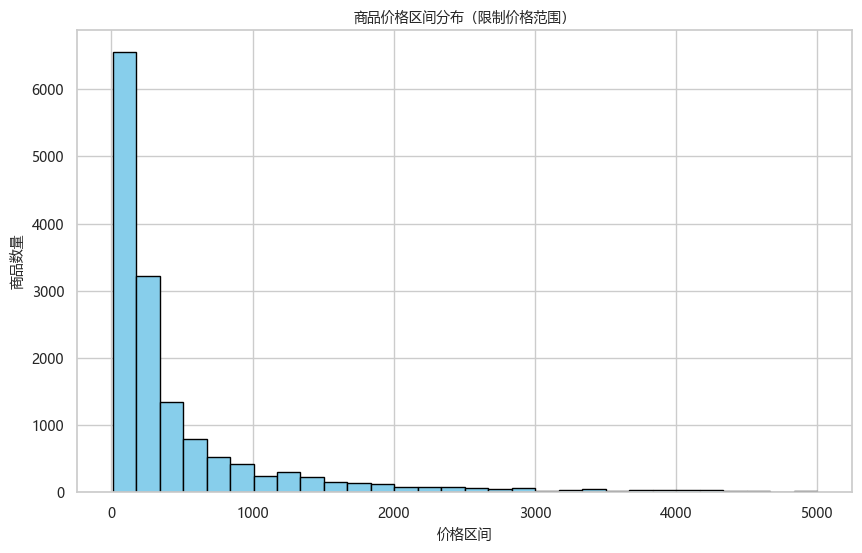

In [25]:
plt.figure(figsize=(10, 6))
maxPriceLimit = 5000 
filteredPrices = mergedData[mergedData['商品现价'] <= maxPriceLimit]['商品现价']
plt.hist(filteredPrices, bins=30, color='skyblue', edgecolor='black')
plt.title('商品价格区间分布（限制价格范围）', fontproperties=my_font)
plt.xlabel('价格区间', fontproperties=my_font)
plt.ylabel('商品数量', fontproperties=my_font)
plt.xticks(fontproperties=my_font)
plt.yticks(fontproperties=my_font)
plt.show()

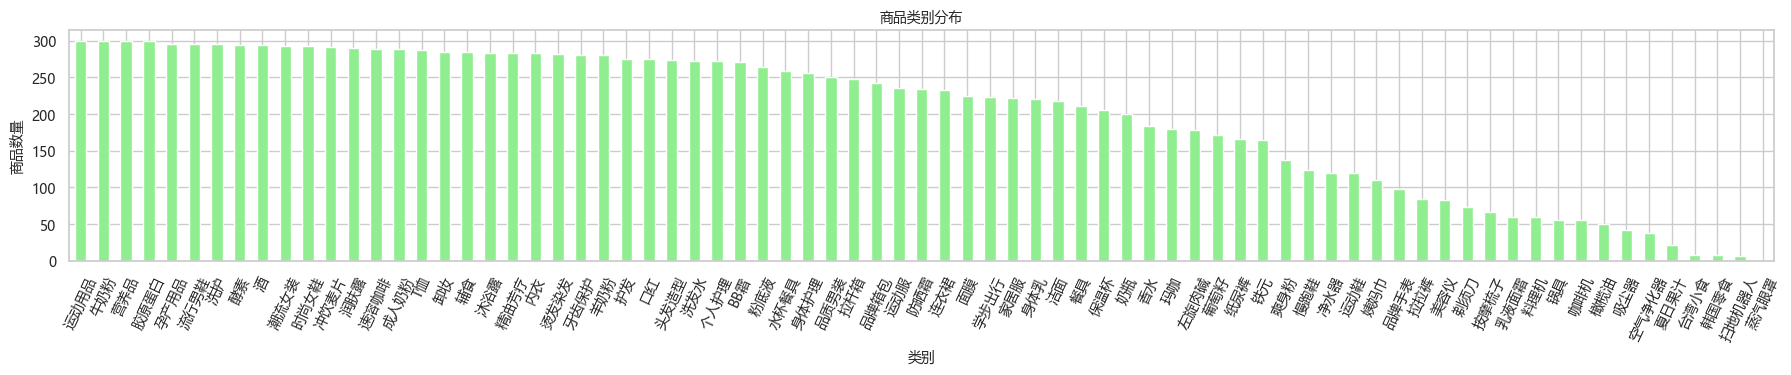

In [26]:
# 商品类别的分布
plt.figure(figsize=(22, 3))
categoryCounts = mergedData['类别'].value_counts()
plt.bar(categoryCounts.index, categoryCounts.values, color='lightgreen', width=0.5)  # 调整柱子的宽度
plt.title('商品类别分布', fontproperties=my_font)
plt.xlabel('类别', fontproperties=my_font)
plt.ylabel('商品数量', fontproperties=my_font)
plt.xticks(rotation=65, fontproperties=my_font)
plt.yticks(fontproperties=my_font)
plt.xlim(-0.5, len(categoryCounts.index)-0.5)  
plt.show()

In [25]:
np.sum(mergedData['评分'].values==2)

14

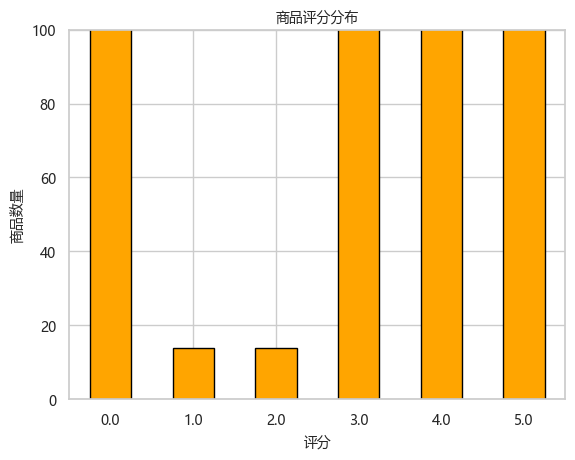

In [28]:
# 绘制商品评分的柱状图
score_counts = mergedData['评分'].value_counts().sort_index()
plt.figure()
score_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title('商品评分分布', fontproperties=my_font)
plt.xlabel('评分', fontproperties=my_font)
plt.ylabel('商品数量', fontproperties=my_font)
plt.xticks(rotation=0, fontproperties=my_font)
plt.yticks(fontproperties=my_font)
plt.ylim(0, 100)
plt.show()

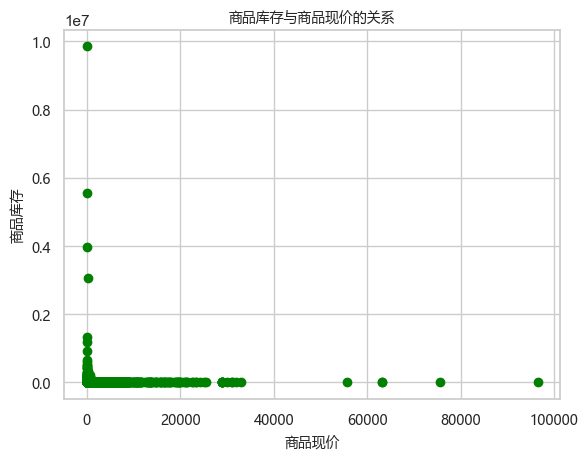

In [29]:
# 商品库存与商品现价的关系图
plt.figure()
plt.scatter(mergedData['商品现价'], mergedData['商品库存'], color='green')
plt.title('商品库存与商品现价的关系', fontproperties=my_font)
plt.xlabel('商品现价', fontproperties=my_font)
plt.ylabel('商品库存', fontproperties=my_font)
plt.xticks(fontproperties=my_font)
plt.yticks(fontproperties=my_font)
plt.show()

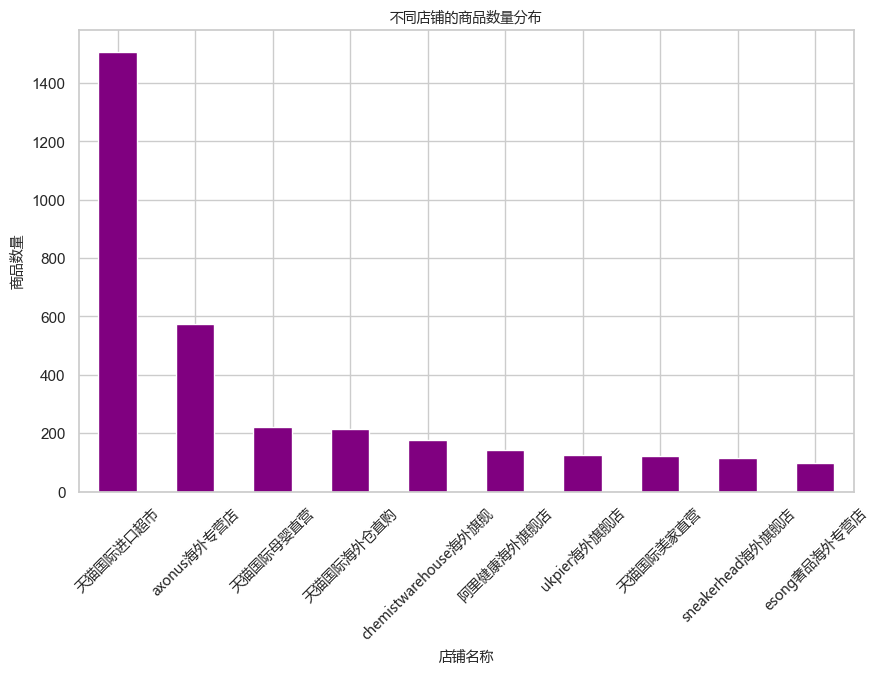

In [30]:
# 不同店铺的商品数量分布柱状图
shopCounts = mergedData['店铺名称'].value_counts().head(10)
plt.figure(figsize=(10, 6))
shopCounts.plot(kind='bar', color='purple')
plt.title('不同店铺的商品数量分布', fontproperties=my_font)
plt.xlabel('店铺名称', fontproperties=my_font)
plt.ylabel('商品数量', fontproperties=my_font)
plt.xticks(rotation=45, fontproperties=my_font)
plt.show()

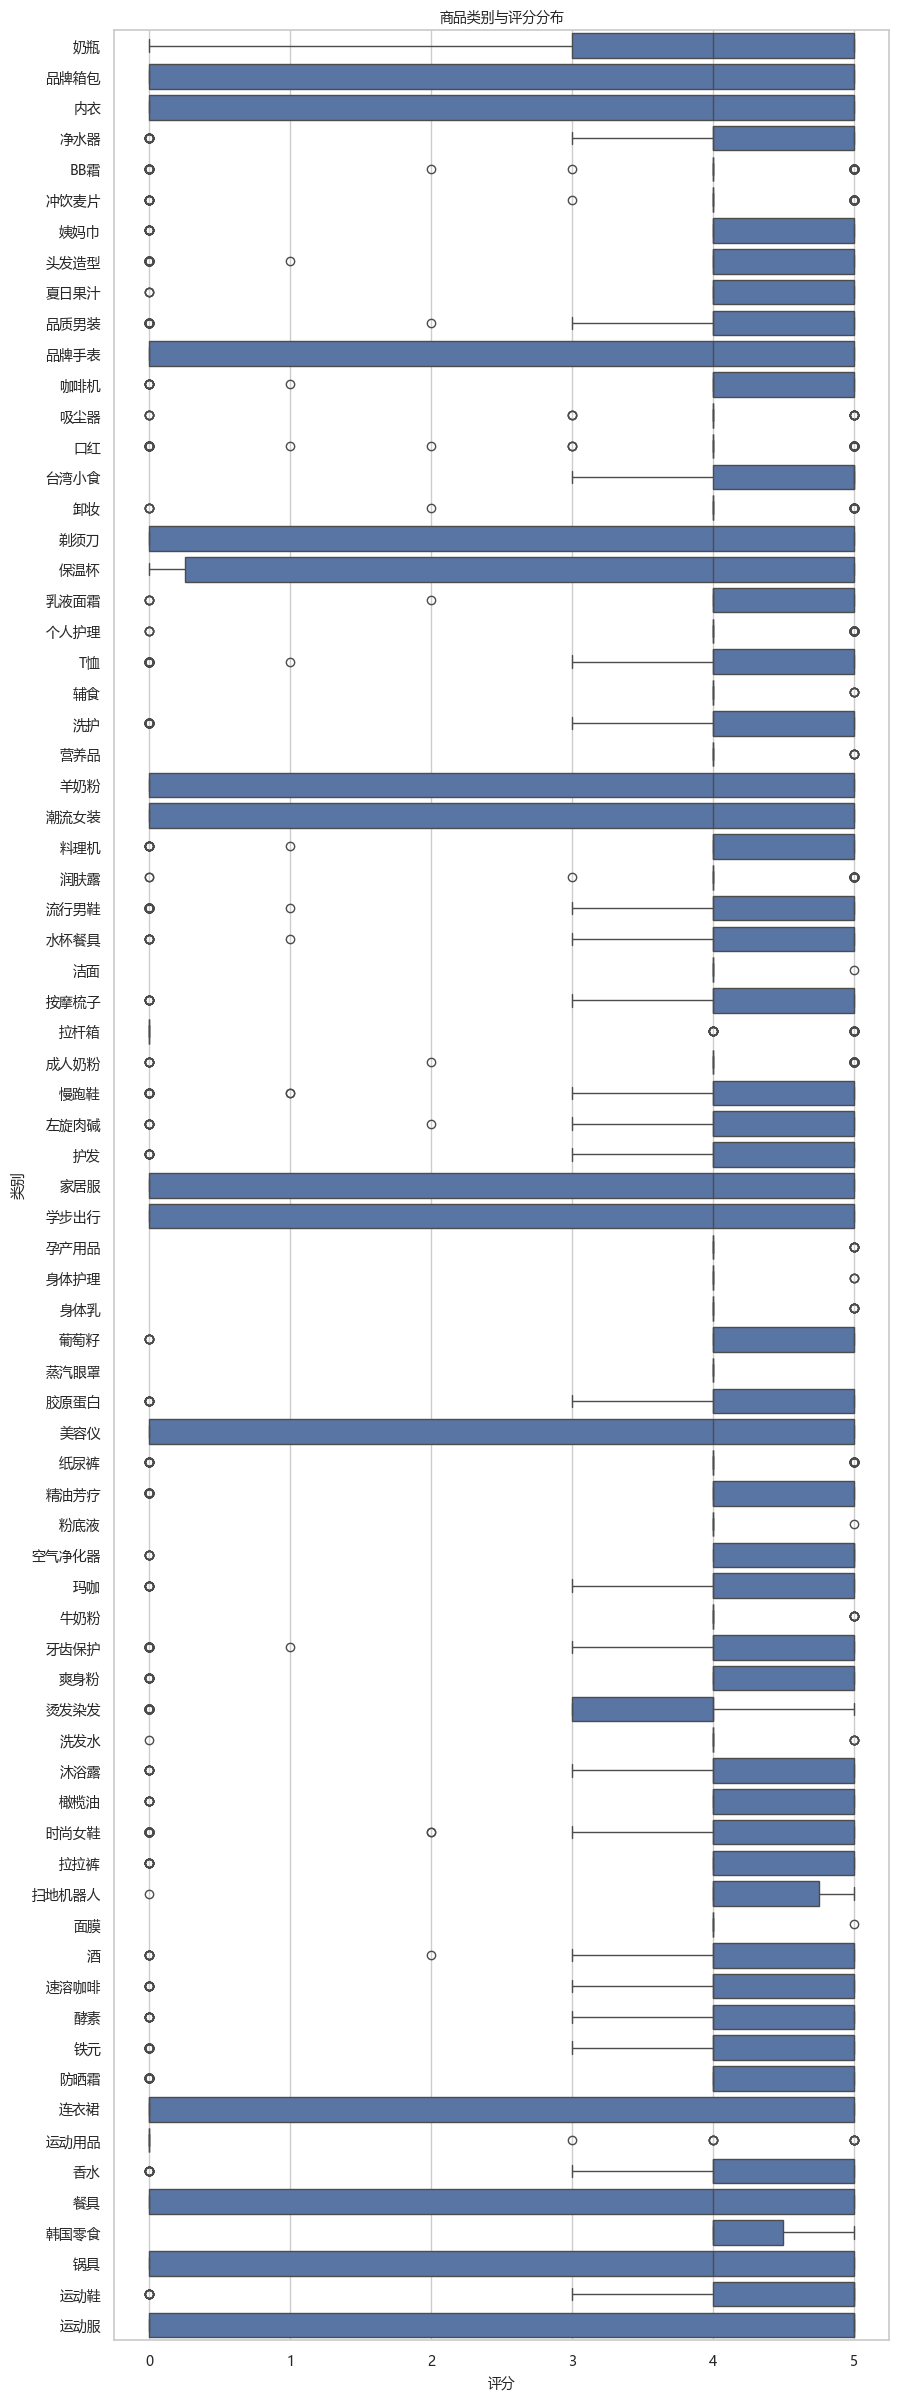

In [31]:
plt.figure(figsize=(10, 30))
sns.boxplot(x='评分', y='类别', data=mergedData)
plt.title('商品类别与评分分布', fontproperties=my_font)
plt.xlabel('评分', fontproperties=my_font)
plt.ylabel('类别', fontproperties=my_font)
plt.xticks(fontproperties=my_font)
plt.yticks(fontproperties=my_font)
plt.show()

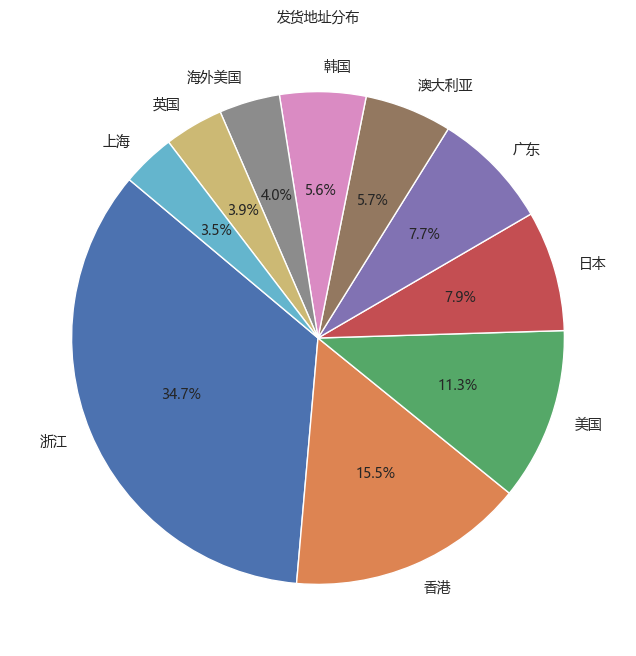

In [32]:
# 发货地址分布的扇形图
addressCounts = mergedData['处理后发货地址'].value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(addressCounts, labels=addressCounts.index, autopct='%1.1f%%',
        startangle=140, textprops={"fontproperties": my_font})
plt.title('发货地址分布', fontproperties=my_font)
plt.show()

In [26]:
mergedData = pd.read_csv('处理后的天猫国际数据.csv')
sentimentScores = pd.read_csv('天猫国际商品评论情感得分.csv')
commentsData = pd.read_csv('待计算得分的comments.csv')
sentimentScores.rename(columns={'ID': '商品ID', 'score': '情感得分'}, inplace=True)
commentsData.rename(columns={'ID': '商品ID'}, inplace=True)
mergedData = pd.merge(mergedData, sentimentScores, on='商品ID', how='left')

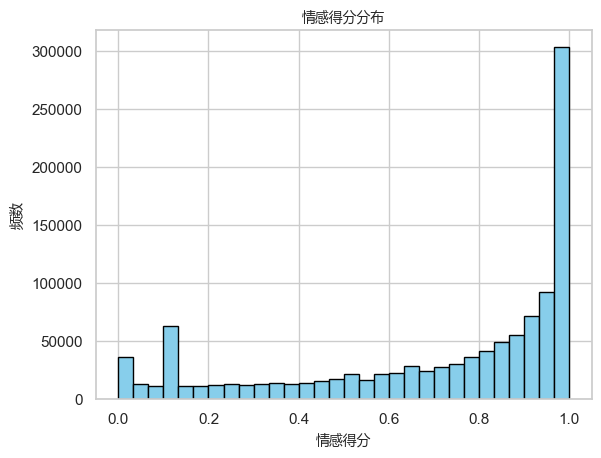

In [33]:
# 情感得分的分布（直方图）
plt.figure()
plt.hist(mergedData['情感得分'], bins=30, color='skyblue', edgecolor='black')
plt.title('情感得分分布', fontproperties=my_font)
plt.xlabel('情感得分', fontproperties=my_font)
plt.ylabel('频数', fontproperties=my_font)
plt.show()

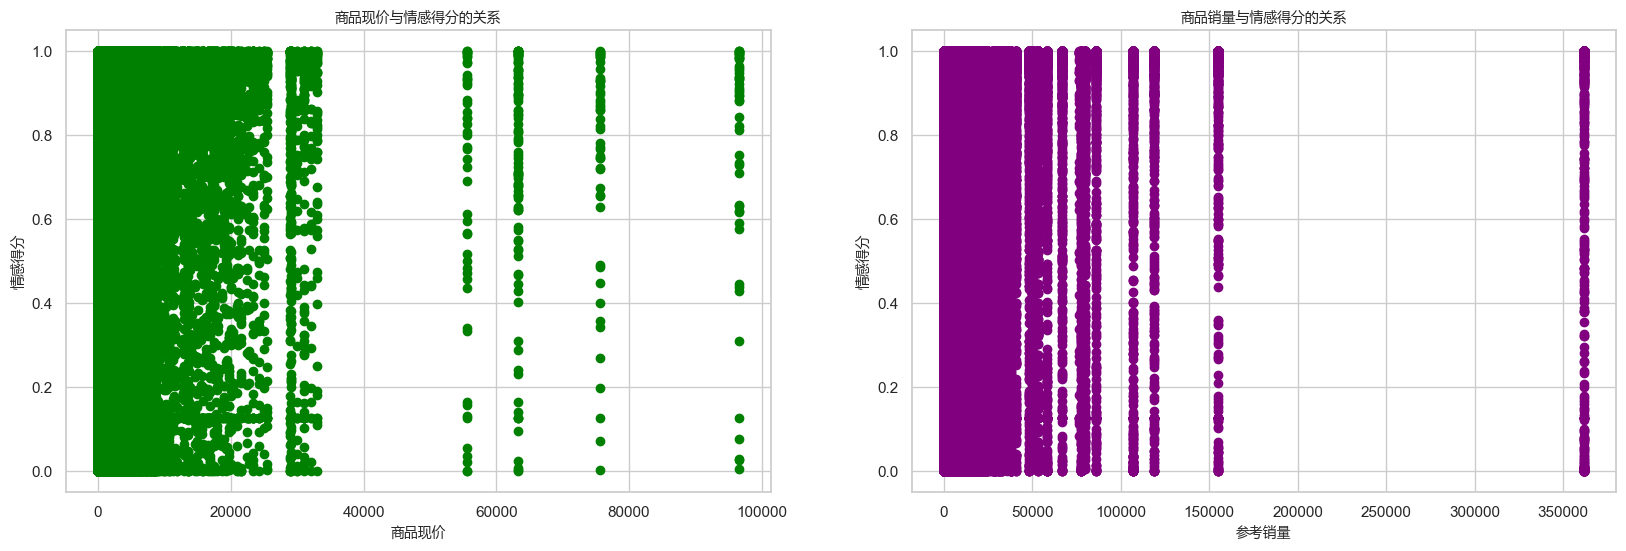

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
# 情感得分与商品现价的关系
ax1.scatter(mergedData['商品现价'], mergedData['情感得分'], color='green')
ax1.set_title('商品现价与情感得分的关系', fontproperties=my_font)
ax1.set_xlabel('商品现价', fontproperties=my_font)
ax1.set_ylabel('情感得分', fontproperties=my_font)
# 情感得分与商品销量的关系
ax2.scatter(mergedData['参考销量'], mergedData['情感得分'], color='purple')
ax2.set_title('商品销量与情感得分的关系', fontproperties=my_font)
ax2.set_xlabel('参考销量', fontproperties=my_font)
ax2.set_ylabel('情感得分', fontproperties=my_font)
plt.show()

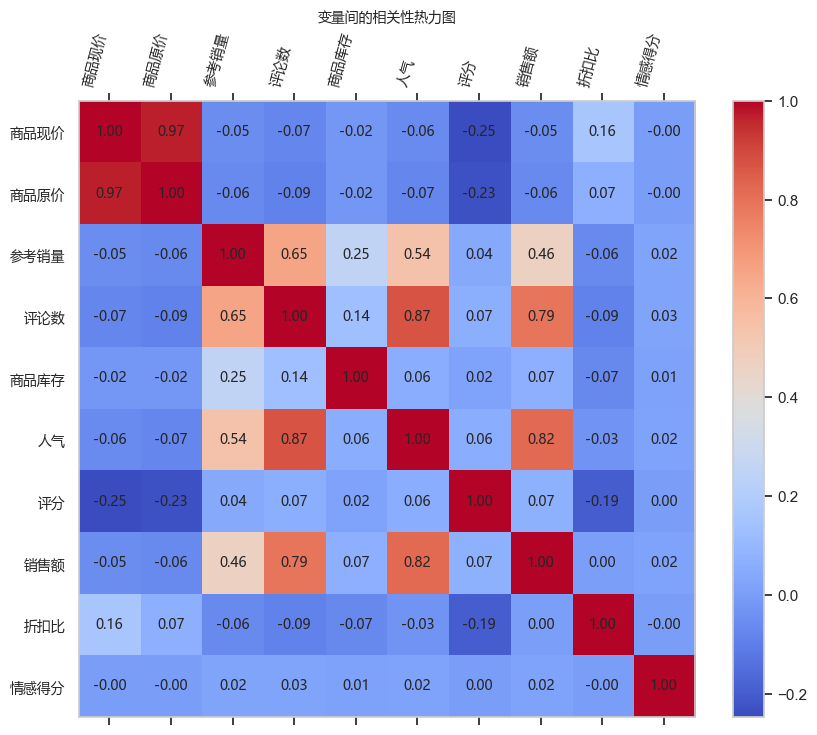

In [35]:
analyzedColumns = ['商品现价', '商品原价', '参考销量', '评论数',
                   '商品库存', '人气', '评分', '销售额', '折扣比', '情感得分']
correlationMatrix = mergedData[analyzedColumns].corr()
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(correlationMatrix, cmap='coolwarm')
ax.grid(False)
plt.colorbar(cax)
ax.set_xticks(np.arange(len(analyzedColumns)))
ax.set_yticks(np.arange(len(analyzedColumns)))
ax.set_xticklabels(analyzedColumns, rotation=75,
                   horizontalalignment='right', fontproperties=my_font)
ax.set_yticklabels(analyzedColumns, fontproperties=my_font)
for (i, j), val in np.ndenumerate(correlationMatrix):
    ax.text(j, i, '{:.2f}'.format(val), ha='center',
            va='center', fontproperties=my_font)
plt.title('变量间的相关性热力图', fontproperties=my_font)
plt.show()

###  4.1  线性回归模型

In [40]:
def prepare_data(data, features, target, test_size=0.2, random_state=42):
    X = data[features].copy()
    y = data[target].copy()
    X.fillna(X.mean(), inplace=True)
    y.fillna(y.mean(), inplace=True)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state)
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    scaler = MinMaxScaler()
    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(
        scaler.transform(X_test), columns=X_test.columns)
    return X_train_scaled, X_test_scaled, y_train, y_test


def plot_results(y_test, y_pred, model_name, mse, r2, target_name, isPCA=False):
    pca_str = " - 使用PCA" if isPCA else ""
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    axs[0].scatter(y_test, y_pred, alpha=0.5)
    axs[0].plot([y_test.min(), y_test.max()], [
                y_test.min(), y_test.max()], 'k--', lw=2)
    axs[0].set_title(f'{model_name}{pca_str} - 实际值与预测值比较',
                     fontproperties=my_font)
    axs[0].set_xlabel(f'实际{target_name}', fontproperties=my_font)
    axs[0].set_ylabel(f'预测{target_name}', fontproperties=my_font)
    axs[0].legend([f'MSE: {mse:.2f}', f'R²: {r2:.2f}'])
    residuals = y_test - y_pred
    axs[1].scatter(y_pred, residuals, alpha=0.5)
    axs[1].axhline(y=0, color='red', linestyle='--')
    axs[1].set_title(f'{model_name}{pca_str} - 残差图', fontproperties=my_font)
    axs[1].set_xlabel(f'预测{target_name}', fontproperties=my_font)
    axs[1].set_ylabel('残差（实际值 - 预测值）', fontproperties=my_font)
    plt.tight_layout()
    plt.show()


def train_model(X_train, y_train, X_test, isPCA=False, n_components=2):
    pca_model = None
    if isPCA:
        pca = PCA(n_components=n_components)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)
        pca_model = pca
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    model = sm.OLS(y_train, X_train).fit()
    print(model.summary())
    return model, X_test, pca_model


def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(
        X.values, i) for i in range(X.shape[1])]
    return vif_data


def print_model_summary(model, X):
    params = model.params
    std_errors = model.bse
    pvalues = model.pvalues
    standardized_coefficients = params / std_errors
    vif_data = calculate_vif(X)
    print("| 变量 | 标准化系数 | P值 | VIF值 |")
    print("|---------|------|---------|-----|")
    for i, feature in enumerate(X.columns):
        print(
            f"| {feature} |  {standardized_coefficients[i]:.4f} | {pvalues[i]:.4g} | {vif_data.iloc[i]['VIF']:.2f} |")

def print_pca_variance_contribution(pca):
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio) * 100
    print("| 主成分 | 累计方差贡献率（%） |")
    print("|-------|-------------------|")
    for i in range(len(explained_variance_ratio)):
        print(f"|  主成分 {i+1} | {cumulative_variance_ratio[i]:.2f}% |")

def print_pca_coefficients_summary(model,features, n_components):
    params = model.params
    std_errors = model.bse
    pvalues = model.pvalues
    print("| 变量名称 |", end=" ")
    for i in range(n_components):
        print(features[i] + f" |", end=" ")
    print()
    print("| 回归系数 |", end=" ")
    for i in range(1, n_components + 1):
        coefficient = params[i] / std_errors[i]
        formatted_coefficient = "{:.3f}".format(coefficient)
        print(f"{formatted_coefficient} |", end=" ")
    print()
    print("| P值 |", end=" ")
    for i in range(1, n_components + 1):
        p_value = pvalues[i]
        formatted_p_value = "{:.3f}".format(p_value)
        print(f"{formatted_p_value} |", end=" ")
    print()


In [39]:
# 特征变量与目标
features = ['商品现价', '商品原价', '参考销量', '评论数', '商品库存',
            '人气', '评分', '情感得分']
target = '销售额'

X_train, X_test, y_train, y_test = prepare_data(mergedData, features, target)

In [138]:
# 线性回归
isPCA = False
model_lr_without_pca, X_test_without_pca, _ = train_model(
    X_train, y_train, X_test, isPCA=isPCA)

                            OLS Regression Results                            
Dep. Variable:                    销售额   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                 2.515e+05
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:37:55   Log-Likelihood:            -1.4395e+07
No. Observations:              890888   AIC:                         2.879e+07
Df Residuals:                  890879   BIC:                         2.879e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.676e+05   1.02e+04     16.355      0.0

In [139]:
# 线性回归系数及方差膨胀系数表
print_model_summary(model_lr_without_pca, X_train)

| 变量 | 标准化系数 | P值 | VIF值 |
|---------|------|---------|-----|
| 商品现价 |  16.3554 | 4.064e-60 | 17.39 |
| 商品原价 |  -0.9692 | 0.3325 | 18.01 |
| 参考销量 |  4.7296 | 2.25e-06 | 1.93 |
| 评论数 |  -81.6010 | 0 | 5.72 |
| 商品库存 |  270.3371 | 0 | 1.09 |
| 人气 |  2.7369 | 0.006202 | 4.58 |
| 评分 |  448.9315 | 0 | 3.98 |
| 情感得分 |  37.1742 | 3.042e-302 | 4.00 |


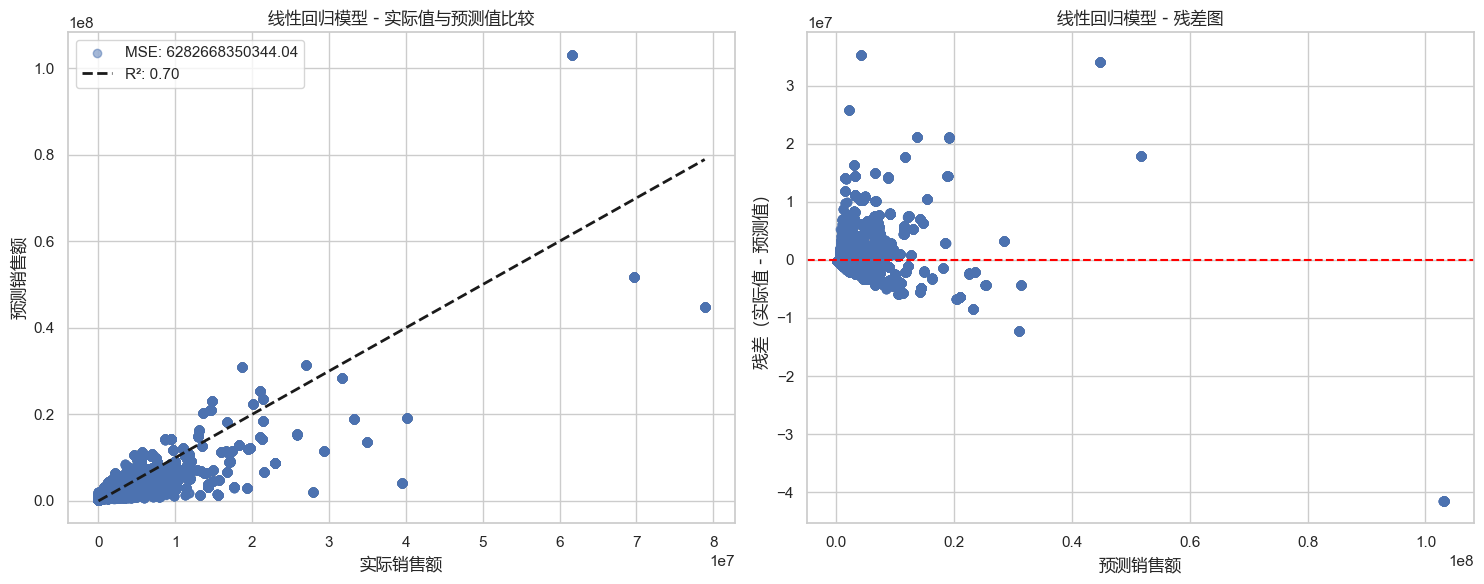

In [124]:
# 结果可视化
y_pred_lr_without_pca = model_lr_without_pca.predict(X_test_without_pca)
mse_lr_without_pca = mean_squared_error(y_test, y_pred_lr_without_pca)
r2_lr_without_pca = r2_score(y_test, y_pred_lr_without_pca)
plot_results(y_test, y_pred_lr_without_pca, '线性回归模型',
             mse_lr_without_pca, r2_lr_without_pca, target, isPCA=isPCA)

In [41]:
# 主成分分析
isPCA = True
n_components = 8
model_lr_with_pca, X_test_with_pca, pca_model = train_model(
    X_train, y_train, X_test, isPCA=isPCA, n_components=n_components)

                            OLS Regression Results                            
Dep. Variable:                    销售额   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                 2.515e+05
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:44:09   Log-Likelihood:            -1.4395e+07
No. Observations:              890888   AIC:                         2.879e+07
Df Residuals:                  890879   BIC:                         2.879e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.75e+06   2667.758    656.107      0.0

In [42]:
# 打印主成分方差贡献率
print_pca_variance_contribution(pca_model)

| 主成分 | 累计方差贡献率（%） |
|-------|-------------------|
|  主成分 1 | 55.49% |
|  主成分 2 | 97.03% |
|  主成分 3 | 98.83% |
|  主成分 4 | 99.26% |
|  主成分 5 | 99.65% |
|  主成分 6 | 99.90% |
|  主成分 7 | 99.99% |
|  主成分 8 | 100.00% |


In [43]:
# 打印主成分回归系数表
print_pca_coefficients_summary(model_lr_with_pca,features, n_components)

| 变量名称 | 商品现价 | 商品原价 | 参考销量 | 评论数 | 商品库存 | 人气 | 评分 | 情感得分 | 
| 回归系数 | -36.638 | -127.560 | 1357.305 | -270.871 | 25.344 | -275.562 | 44.430 | 2.944 | 
| P值 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.003 | 


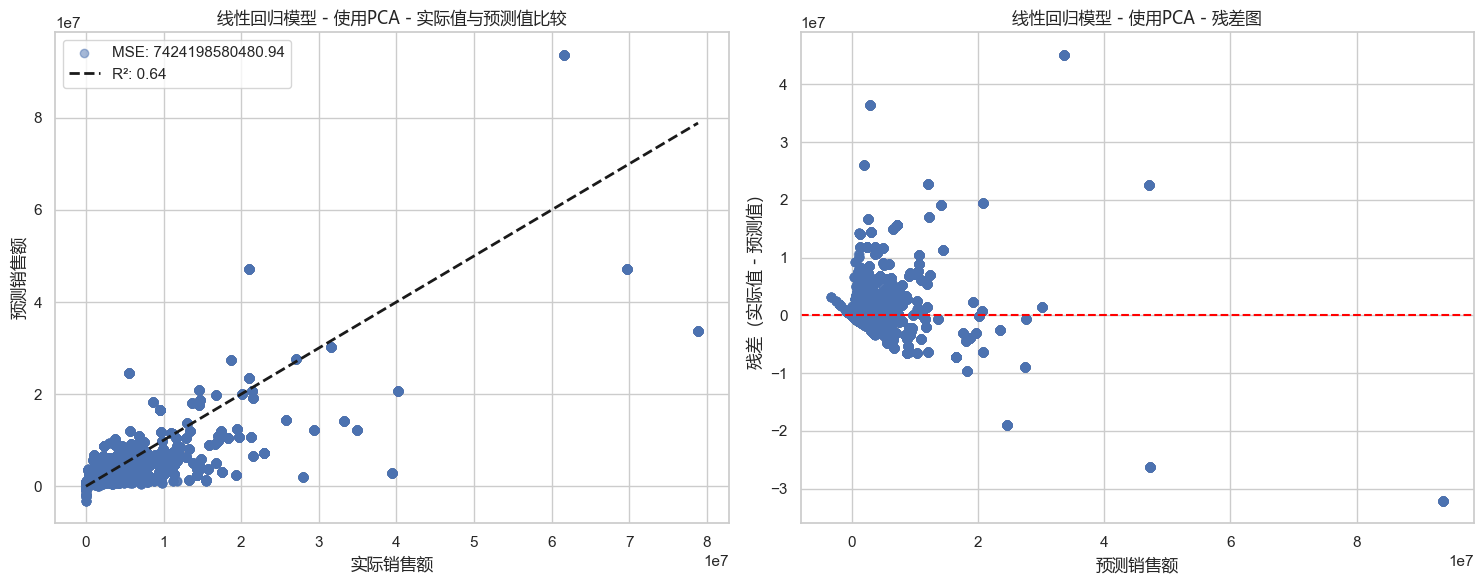

In [108]:
# 结果可视化
y_pred_lr_with_pca = model_lr_with_pca.predict(X_test_with_pca)
mse_lr_with_pca = mean_squared_error(y_test, y_pred_lr_with_pca)
r2_lr_with_pca = r2_score(y_test, y_pred_lr_with_pca)
plot_results(y_test, y_pred_lr_with_pca, '线性回归模型',
             mse_lr_with_pca, r2_lr_with_pca, target, isPCA=isPCA)

In [46]:
# 特征变量与目标
features = ['商品现价', '商品原价', '参考销量', '评论数', '商品库存',
            '人气', '评分', '销售额']
target = '情感得分'

X_train, X_test, y_train, y_test = prepare_data(mergedData, features, target)

In [45]:
# 线性回归
isPCA = False
model_lr_without_pca, X_test_without_pca, _ = train_model(
    X_train, y_train, X_test, isPCA=isPCA)

                            OLS Regression Results                            
Dep. Variable:                   情感得分   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     103.8
Date:                Thu, 23 Nov 2023   Prob (F-statistic):          5.92e-174
Time:                        01:44:48   Log-Likelihood:            -2.3361e+05
No. Observations:              890888   AIC:                         4.672e+05
Df Residuals:                  890879   BIC:                         4.673e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7079      0.001    682.348      0.0

In [144]:
# 线性回归系数及方差膨胀系数表
print_model_summary(model_lr_without_pca, X_train)

| 变量 | 标准化系数 | P值 | VIF值 |
|---------|------|---------|-----|
| 商品现价 |  682.3480 | 0 | 17.39 |
| 商品原价 |  1.0022 | 0.3162 | 17.96 |
| 参考销量 |  -0.4877 | 0.6257 | 1.94 |
| 评论数 |  7.6655 | 1.783e-14 | 6.19 |
| 商品库存 |  10.8385 | 2.271e-27 | 1.09 |
| 人气 |  6.7583 | 1.397e-11 | 5.62 |
| 评分 |  -7.4035 | 1.328e-13 | 1.32 |
| 销售额 |  -1.6432 | 0.1003 | 3.74 |


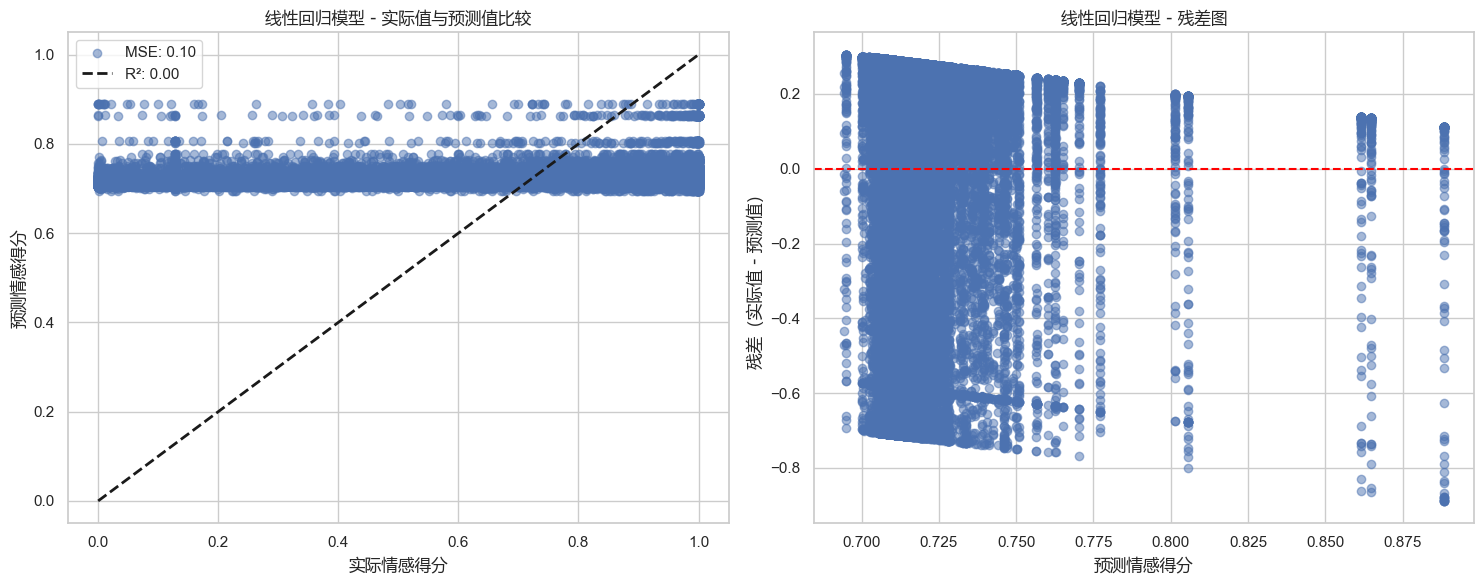

In [131]:
# 结果可视化
y_pred_lr_without_pca = model_lr_without_pca.predict(X_test_without_pca)
mse_lr_without_pca = mean_squared_error(y_test, y_pred_lr_without_pca)
r2_lr_without_pca = r2_score(y_test, y_pred_lr_without_pca)
plot_results(y_test, y_pred_lr_without_pca, '线性回归模型',
             mse_lr_without_pca, r2_lr_without_pca, target, isPCA=isPCA)

In [47]:
# 主成分分析
isPCA = True
n_components = 8
model_lr_with_pca, X_test_with_pca, pca_model = train_model(
    X_train, y_train, X_test, isPCA=isPCA, n_components=n_components)

                            OLS Regression Results                            
Dep. Variable:                   情感得分   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     103.8
Date:                Thu, 23 Nov 2023   Prob (F-statistic):          5.92e-174
Time:                        01:44:58   Log-Likelihood:            -2.3361e+05
No. Observations:              890888   AIC:                         4.672e+05
Df Residuals:                  890879   BIC:                         4.673e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7098      0.000   2130.118      0.0

In [37]:
# 打印主成分方差贡献率
print_pca_variance_contribution(pca_model)

| 主成分 | 累计方差贡献率（%） |
|-------|-------------------|
|  主成分 1 | 89.60% |
|  主成分 2 | 96.69% |
|  主成分 3 | 97.80% |
|  主成分 4 | 98.63% |
|  主成分 5 | 99.35% |
|  主成分 6 | 99.78% |
|  主成分 7 | 99.99% |
|  主成分 8 | 100.00% |


In [48]:
# 打印主成分回归系数表
print_pca_coefficients_summary(model_lr_with_pca, features,n_components)

| 变量名称 | 商品现价 | 商品原价 | 参考销量 | 评论数 | 商品库存 | 人气 | 评分 | 销售额 | 
| 回归系数 | 0.234 | 23.159 | 13.655 | 3.358 | 0.844 | 3.701 | -9.032 | -0.771 | 
| P值 | 0.815 | 0.000 | 0.000 | 0.001 | 0.399 | 0.000 | 0.000 | 0.440 | 


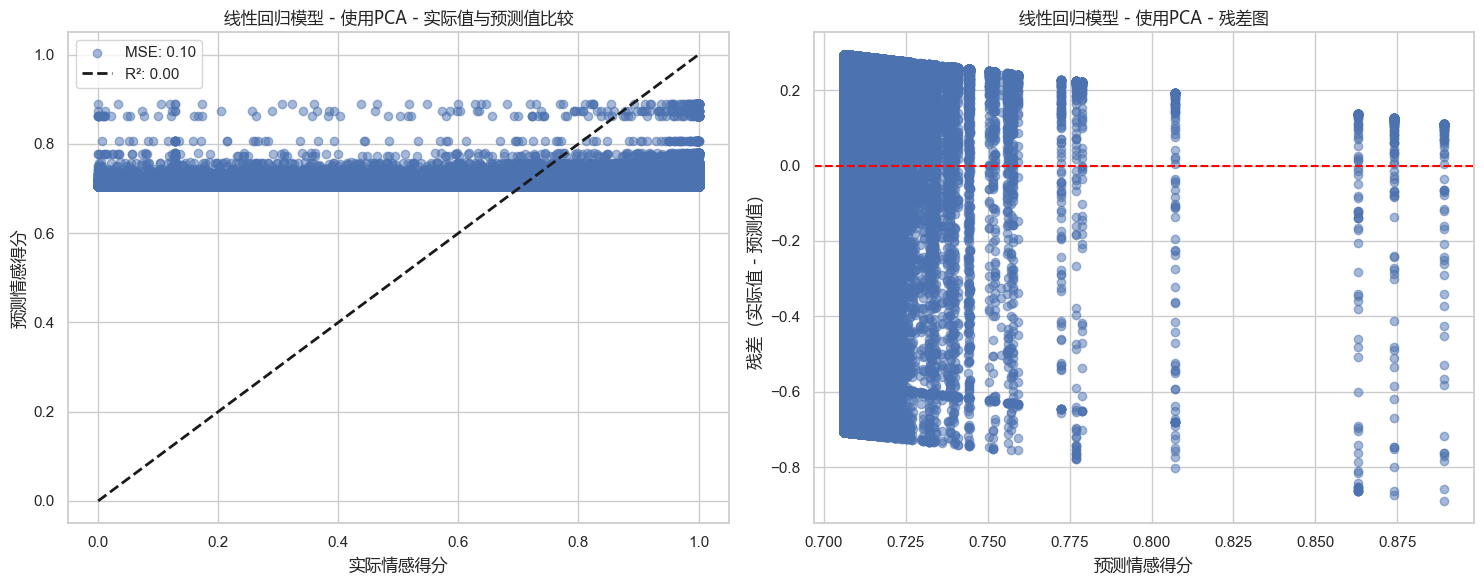

In [120]:
# 结果可视化
y_pred_lr_with_pca = model_lr_with_pca.predict(X_test_with_pca)
mse_lr_with_pca = mean_squared_error(y_test, y_pred_lr_with_pca)
r2_lr_with_pca = r2_score(y_test, y_pred_lr_with_pca)
plot_results(y_test, y_pred_lr_with_pca, '线性回归模型',
             mse_lr_with_pca, r2_lr_with_pca, target, isPCA=isPCA)

In [37]:
import cudf
import cupy as cp
import numpy as np
from cuml.linear_model import LinearRegression
from cuml.metrics.regression import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from cuml.decomposition import PCA
from sklearn.model_selection import train_test_split
from cuml.ensemble import RandomForestRegressor as cuMLRandomForestRegressor
from cuml.neighbors import KNeighborsClassifier

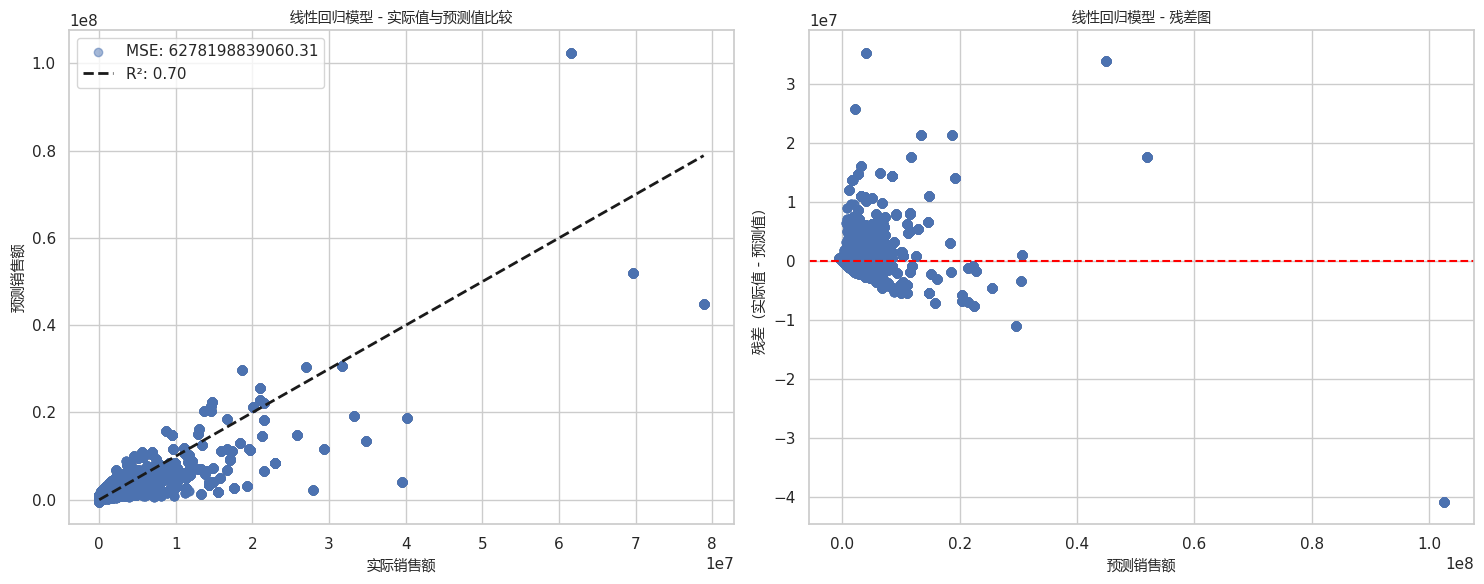

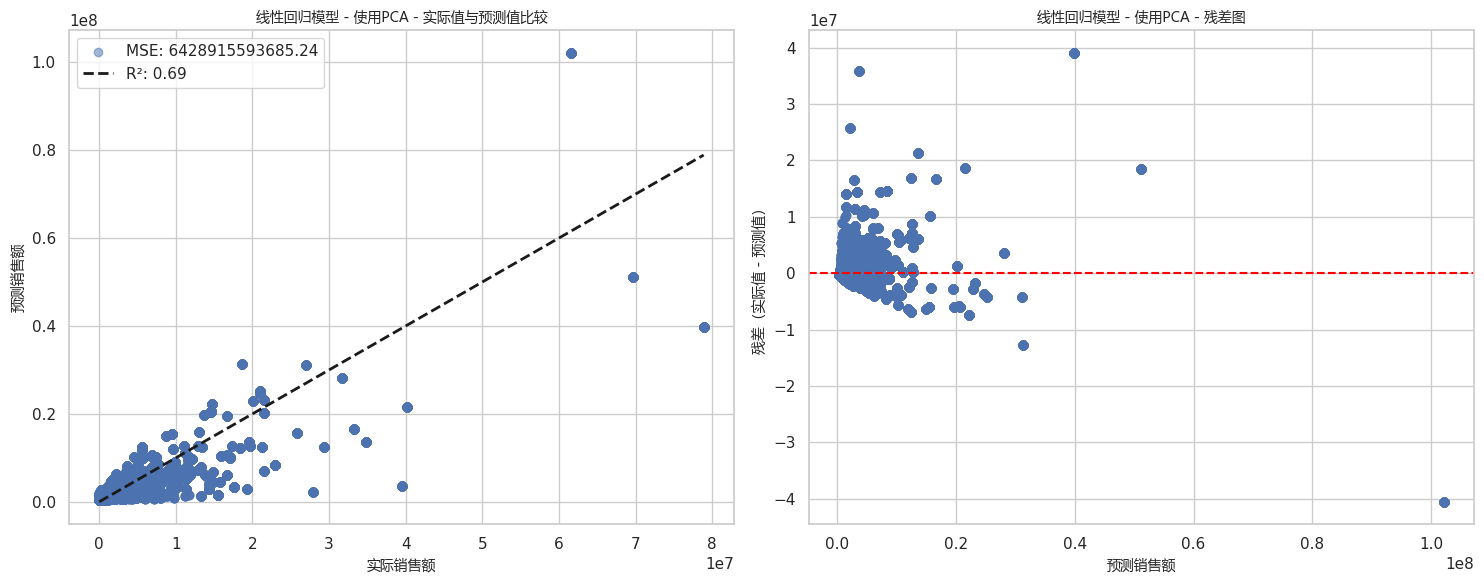

In [56]:
def plotResults(y_test, y_pred, model_name, mse, r2, target_name, isPCA=False):
    pca_str = " - 使用PCA" if isPCA else ""
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    axs[0].scatter(y_test, y_pred, alpha=0.5)
    axs[0].plot([y_test.min(), y_test.max()], [
                y_test.min(), y_test.max()], 'k--', lw=2)
    axs[0].set_title(f'{model_name}{pca_str} - 实际值与预测值比较',
                     fontproperties=my_font)
    axs[0].set_xlabel(f'实际{target_name}', fontproperties=my_font)
    axs[0].set_ylabel(f'预测{target_name}', fontproperties=my_font)
    axs[0].legend([f'MSE: {mse:.2f}', f'R²: {r2:.2f}'])

    residuals = y_test - y_pred
    axs[1].scatter(y_pred, residuals, alpha=0.5)
    axs[1].axhline(y=0, color='red', linestyle='--')
    axs[1].set_title(f'{model_name}{pca_str} - 残差图', fontproperties=my_font)
    axs[1].set_xlabel(f'预测{target_name}', fontproperties=my_font)
    axs[1].set_ylabel('残差（实际值 - 预测值）', fontproperties=my_font)

    plt.tight_layout()
    plt.show()


def prepare_data(data, features, target):
    X = data[features].copy()  
    y = data[target].copy()
    X.fillna(X.mean(), inplace=True)
    y.fillna(y.mean(), inplace=True)
    return train_test_split(X, y, test_size=0.2, random_state=42)


def train_model(X_train, y_train, X_test, model, isPCA=False, n_components=2):
    trainCudf = cudf.DataFrame(X_train)
    testCudf = cudf.DataFrame(X_test)
    yTrainCudf = cudf.Series(y_train)

    scaler = StandardScaler()
    trainNp = cp.asnumpy(trainCudf.values)
    testNp = cp.asnumpy(testCudf.values)
    trainScaledNp = scaler.fit_transform(trainNp)
    testScaledNp = scaler.transform(testNp)

    if isPCA:
        pca = PCA(n_components=n_components)
        trainScaled = cp.asarray(pca.fit_transform(
            cp.asarray(trainScaledNp).astype('float32')))
        testScaled = cp.asarray(pca.transform(
            cp.asarray(testScaledNp).astype('float32')))
    else:
        trainScaled = cp.asarray(trainScaledNp)
        testScaled = cp.asarray(testScaledNp)

    model.fit(trainScaled.astype('float32'), yTrainCudf.astype('float32'))
    return model.predict(testScaled.astype('float32'))


features = ['商品现价', '评论数', '人气', '评分', '折扣比']
target = '销售额'
X_train, X_test, y_train, y_test = prepare_data(mergedData, features, target)

isPCA = False
lrModel = LinearRegression(
    fit_intercept=True, normalize=True, algorithm='eig', copy_X=True)
y_pred_lr = train_model(X_train, y_train, X_test, lrModel, isPCA=isPCA)
mse_lr_without_pca = mean_squared_error(y_test, y_pred_lr)
r2_lr_without_pca = r2_score(y_test, y_pred_lr)
plotResults(y_test.values, y_pred_lr.get(), '线性回归模型',
            mse_lr_without_pca, r2_lr_without_pca, target, isPCA=isPCA)

isPCA = True
lrModel = LinearRegression(
    fit_intercept=True, normalize=True, algorithm='eig', copy_X=True)
y_pred_lr = train_model(X_train, y_train, X_test, lrModel, isPCA=isPCA)
mse_lr_with_pca = mean_squared_error(y_test, y_pred_lr)
r2_lr_with_pca = r2_score(y_test, y_pred_lr)
plotResults(y_test.values, y_pred_lr.get(), '线性回归模型',
            mse_lr_with_pca, r2_lr_with_pca, target, isPCA=isPCA)

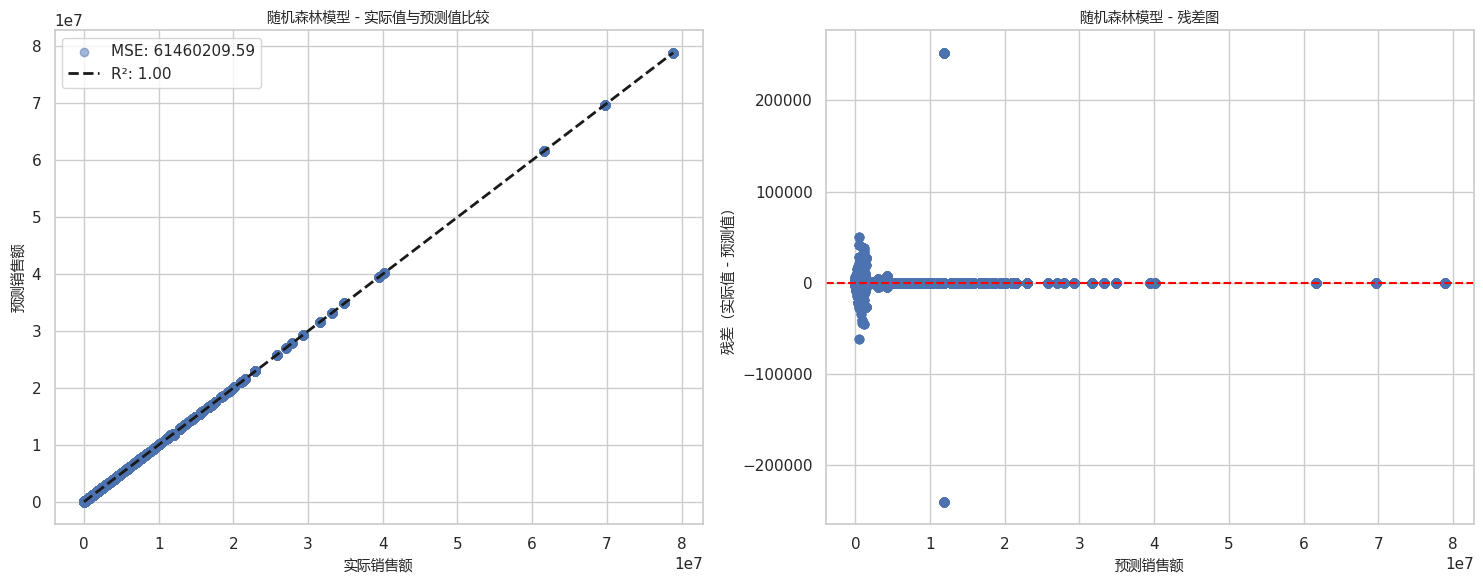

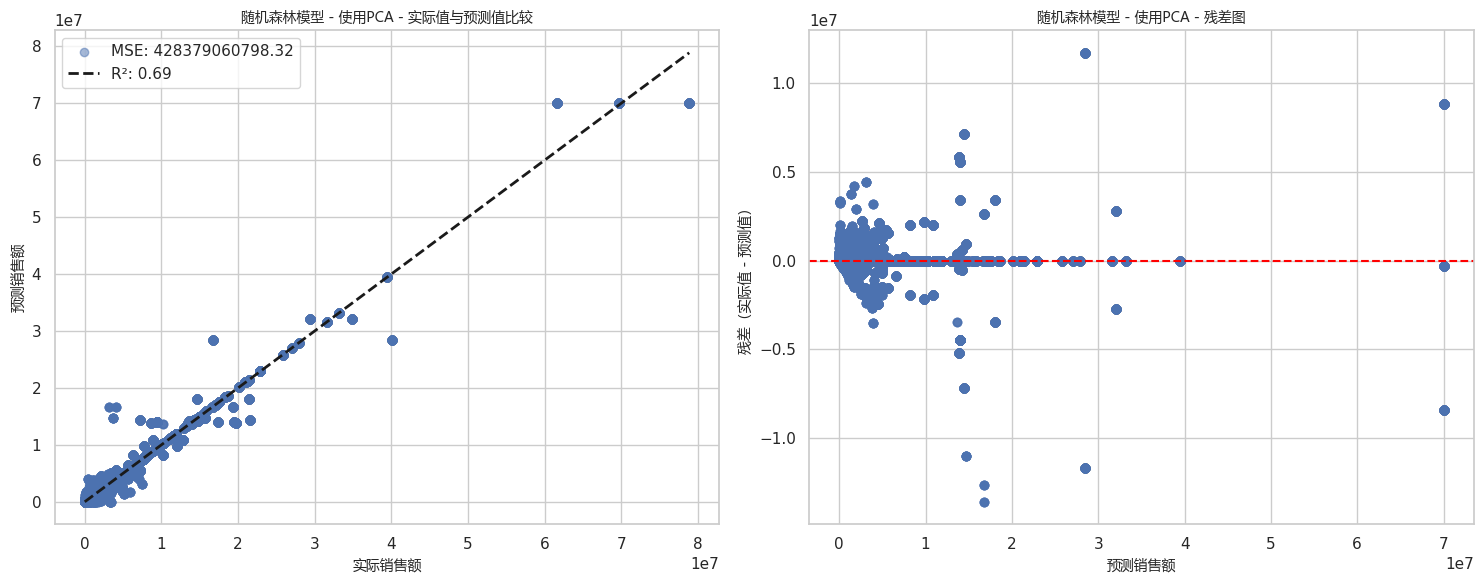

In [57]:
isPCA = False
rfModel = cuMLRandomForestRegressor(
    n_estimators=100, random_state=42, n_streams=1)
y_pred_rf = train_model(X_train, y_train, X_test, rfModel, isPCA=isPCA)
mse_rf_without_pca = mean_squared_error(y_test, y_pred_rf)
r2_rf_without_pca = r2_score(y_test, y_pred_rf)
plotResults(y_test.values, y_pred_rf.get(), '随机森林模型',
            mse_rf_without_pca, r2_rf_without_pca, target, isPCA=isPCA)

isPCA = True
rfModel = cuMLRandomForestRegressor(
    n_estimators=100, random_state=42, n_streams=1)
y_pred_rf = train_model(X_train, y_train, X_test, rfModel, isPCA=isPCA)
mse_rf_with_pca = mean_squared_error(y_test, y_pred_rf)
r2_rf_with_pca = r2_score(y_test, y_pred_rf)
plotResults(y_test.values, y_pred_rf.get(), '随机森林模型',
            mse_rf_with_pca, r2_lr_with_pca, target, isPCA=isPCA)

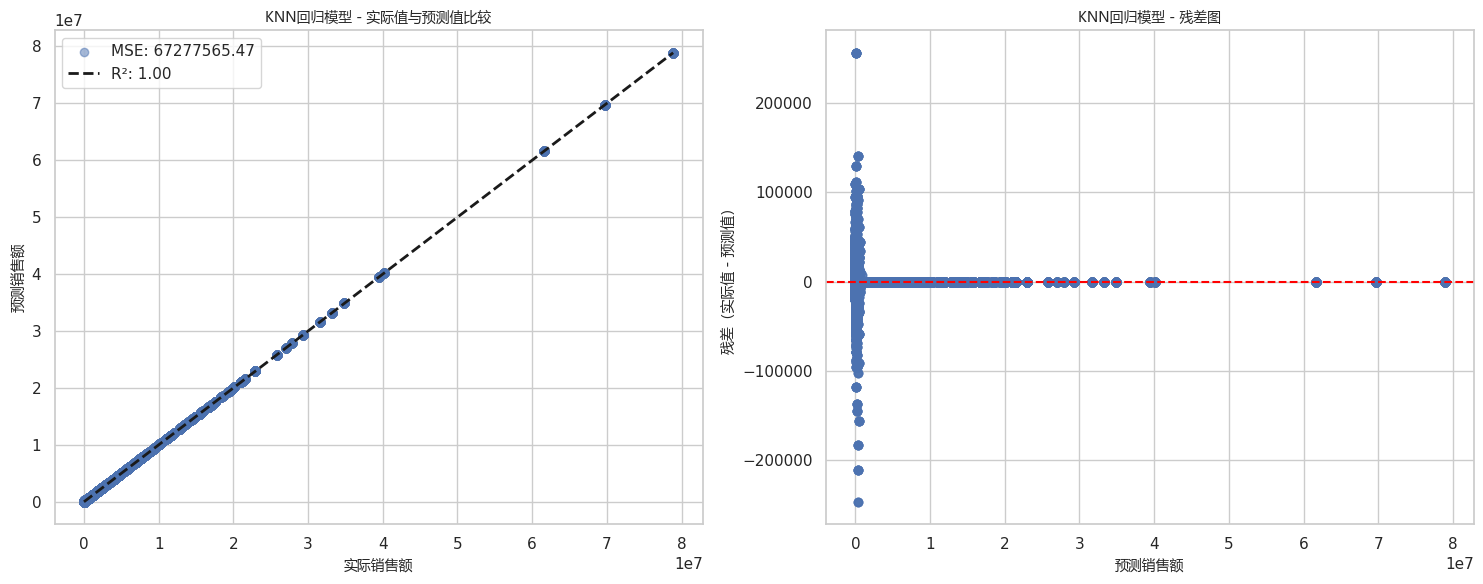

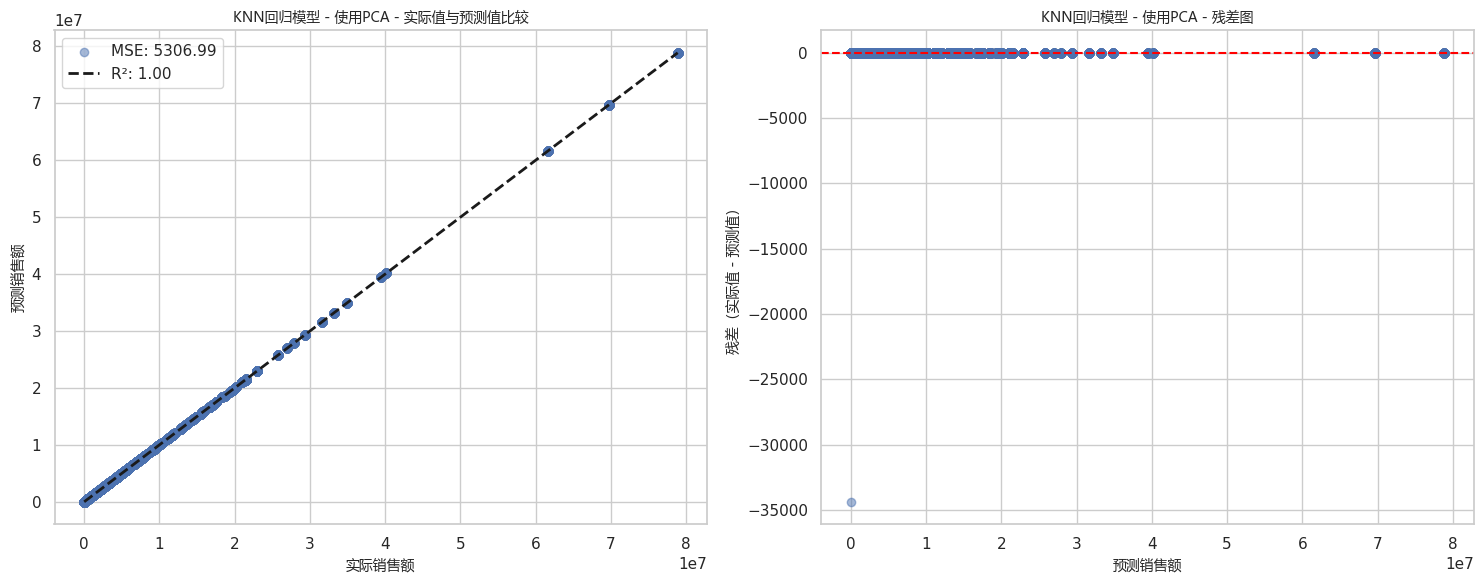

In [58]:
isPCA = False
knnModel = KNeighborsRegressor(n_neighbors=5)
y_pred_knn = train_model(X_train, y_train, X_test, knnModel, isPCA=isPCA)
mse_knn_without_pca = mean_squared_error(y_test, y_pred_knn)
r2_knn_without_pca = r2_score(y_test, y_pred_knn)
plotResults(y_test.values, y_pred_knn.get(), 'KNN回归模型',
            mse_knn_without_pca, r2_knn_without_pca, target, isPCA=isPCA)

isPCA = True
knnModel = KNeighborsRegressor(n_neighbors=5)
y_pred_knn = train_model(X_train, y_train, X_test, knnModel, isPCA=isPCA)
mse_knn_with_pca = mean_squared_error(y_test, y_pred_knn)
r2_knn_with_pca = r2_score(y_test, y_pred_knn)
plotResults(y_test.values, y_pred_knn.get(), 'KNN回归模型',
            mse_knn_with_pca, r2_knn_with_pca, target, isPCA=isPCA)

In [59]:
def print_evaluation_table(evaluations):
    markdown_table = "| 模型 | 是否使用PCA | MSE | R² 分数 |\n"
    markdown_table += "|------|------------|-----|---------|\n"
    for model_name, is_pca, mse, r2 in evaluations:
        pca_str = "是" if is_pca else "否"
        markdown_table += f"| {model_name} | {pca_str} | {mse:.2f} | {r2:.2f} |\n"

    print(markdown_table)


evaluations = [
    ("线性回归模型", False, mse_lr_without_pca, r2_lr_without_pca),
    ("线性回归模型", True, mse_lr_with_pca, r2_lr_with_pca),
    ("随机森林模型", False, mse_rf_without_pca, r2_rf_without_pca),
    ("随机森林模型", True, mse_rf_with_pca, r2_rf_with_pca),
    ("KNN回归模型", False, mse_knn_without_pca, r2_knn_without_pca),
    ("KNN回归模型", True, mse_knn_with_pca, r2_knn_with_pca)
]

print_evaluation_table(evaluations)

| 模型 | 是否使用PCA | MSE | R² 分数 |
|------|------------|-----|---------|
| 线性回归模型 | 否 | 6278198839060.31 | 0.70 |
| 线性回归模型 | 是 | 6428915593685.24 | 0.69 |
| 随机森林模型 | 否 | 61460209.59 | 1.00 |
| 随机森林模型 | 是 | 428379060798.32 | 0.98 |
| KNN回归模型 | 否 | 67277565.47 | 1.00 |
| KNN回归模型 | 是 | 5306.99 | 1.00 |



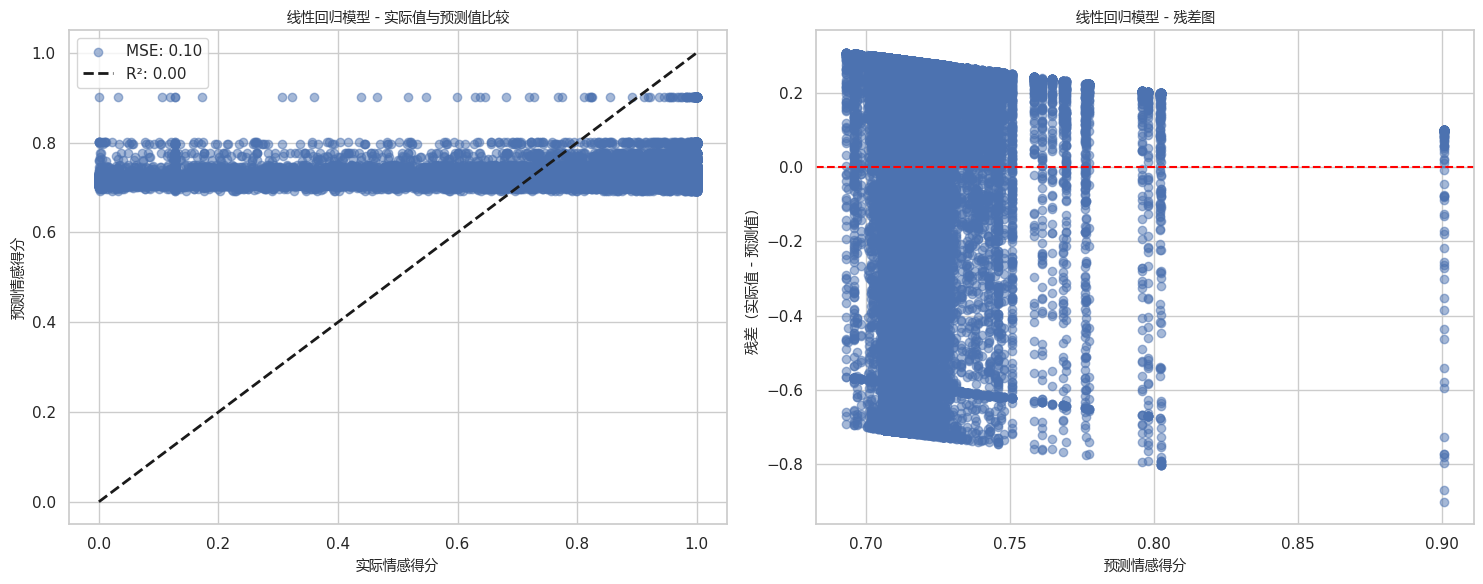

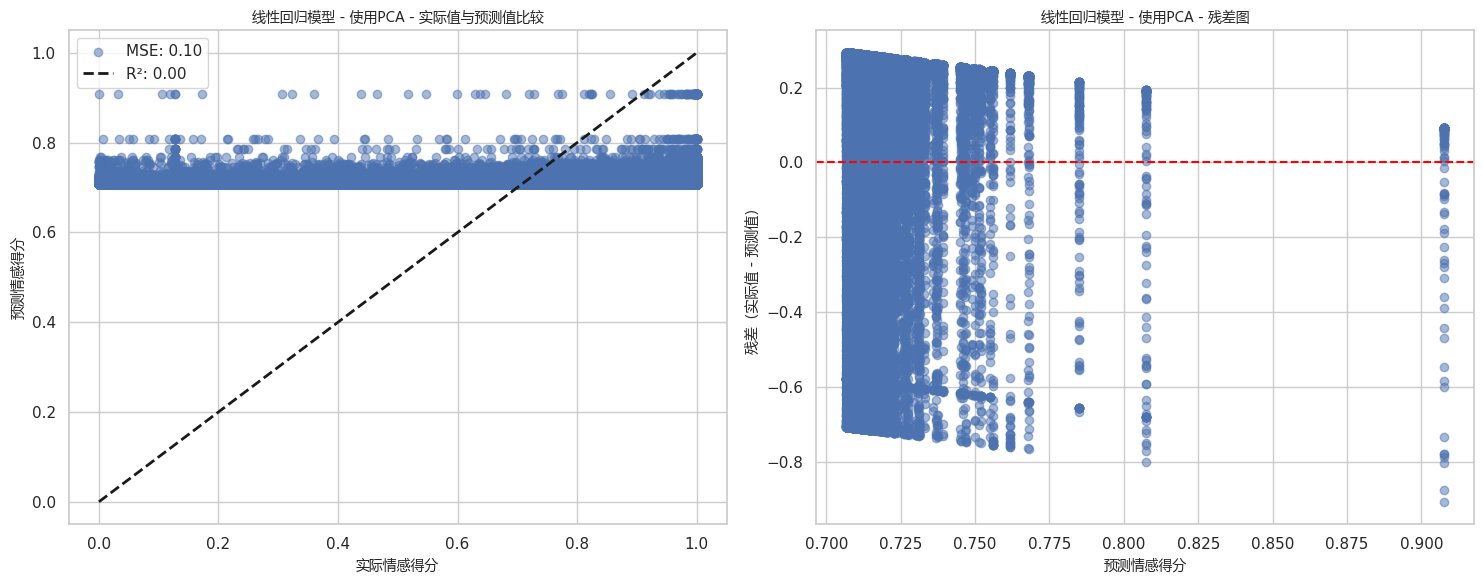

In [60]:
features = ['商品现价', '评论数', '人气', '评分', '折扣比']
target = '情感得分'
X_train, X_test, y_train, y_test = prepare_data(mergedData, features, target)

isPCA = False
lrModel = LinearRegression(
    fit_intercept=True, normalize=True, algorithm='eig', copy_X=True)
y_pred_lr = train_model(X_train, y_train, X_test, lrModel, isPCA=isPCA)
mse_lr_without_pca = mean_squared_error(y_test, y_pred_lr)
r2_lr_without_pca = r2_score(y_test, y_pred_lr)
plotResults(y_test.values, y_pred_lr.get(), '线性回归模型',
            mse_lr_without_pca, r2_lr_without_pca, target, isPCA=isPCA)

isPCA = True
lrModel = LinearRegression(
    fit_intercept=True, normalize=True, algorithm='eig', copy_X=True)
y_pred_lr = train_model(X_train, y_train, X_test, lrModel, isPCA=isPCA)
mse_lr_with_pca = mean_squared_error(y_test, y_pred_lr)
r2_lr_with_pca = r2_score(y_test, y_pred_lr)
plotResults(y_test.values, y_pred_lr.get(), '线性回归模型',
            mse_lr_with_pca, r2_lr_with_pca, target, isPCA=isPCA)

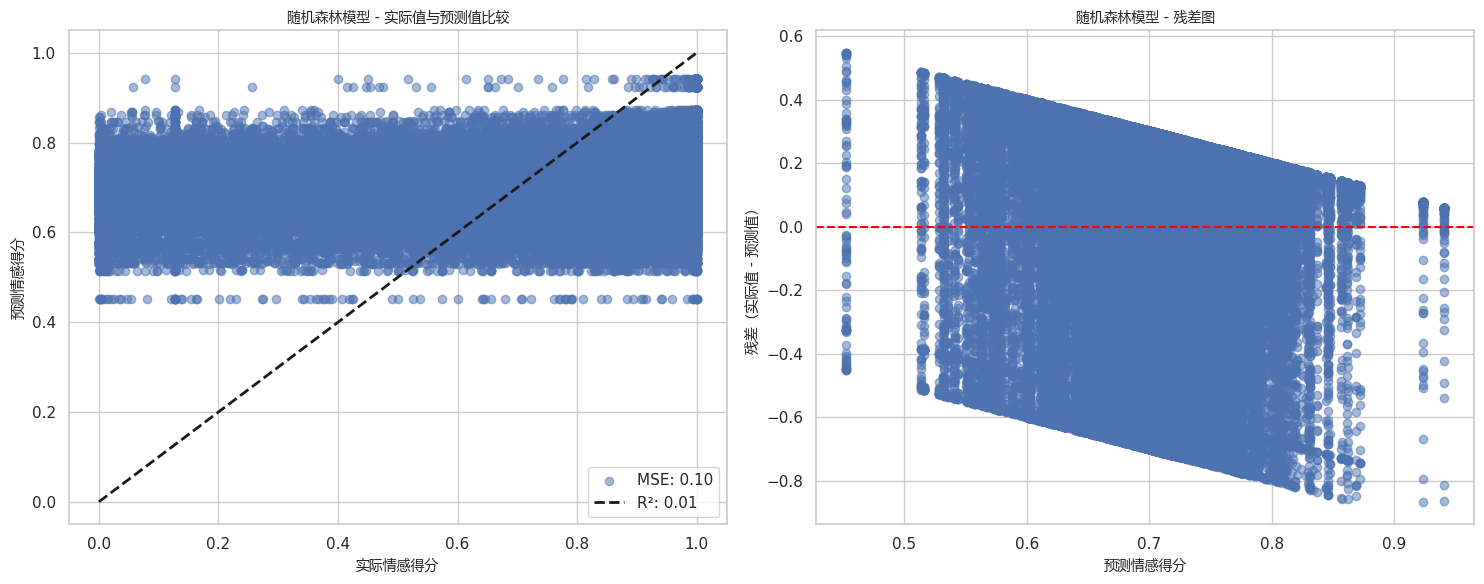

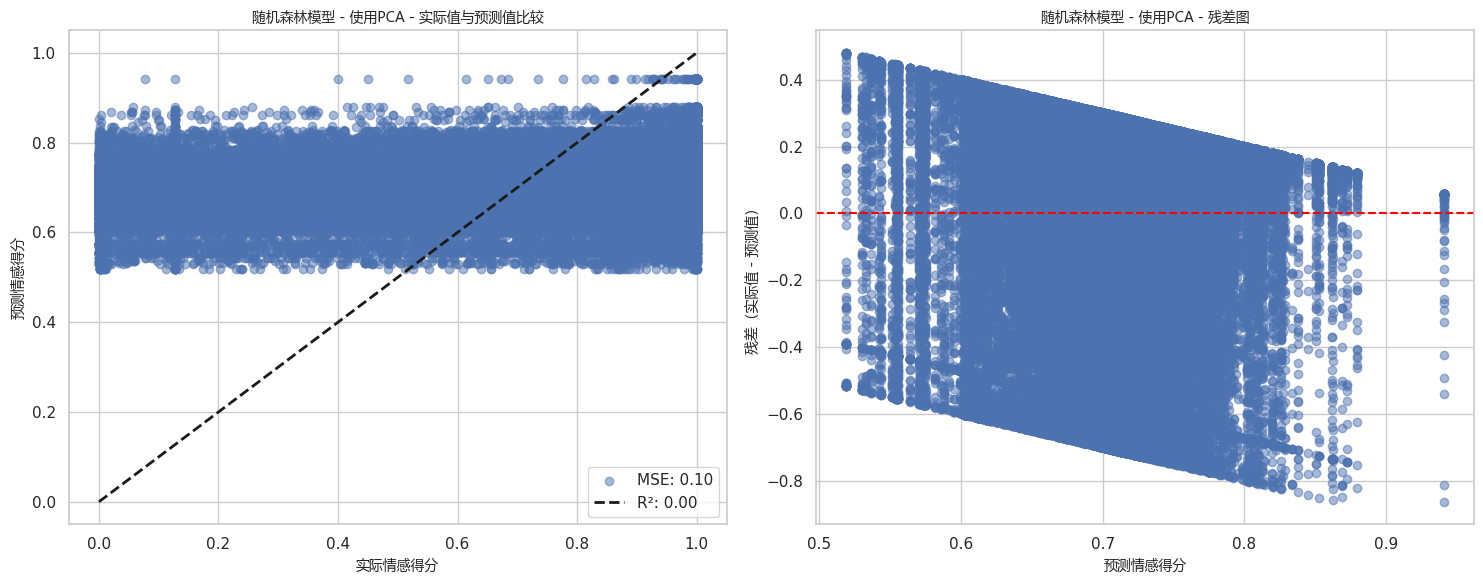

In [61]:
isPCA = False
rfModel = cuMLRandomForestRegressor(
    n_estimators=100, random_state=42, n_streams=1)
y_pred_rf = train_model(X_train, y_train, X_test, rfModel, isPCA=isPCA)
mse_rf_without_pca = mean_squared_error(y_test, y_pred_rf)
r2_rf_without_pca = r2_score(y_test, y_pred_rf)
plotResults(y_test.values, y_pred_rf.get(), '随机森林模型',
            mse_rf_without_pca, r2_rf_without_pca, target, isPCA=isPCA)

isPCA = True
rfModel = cuMLRandomForestRegressor(
    n_estimators=100, random_state=42, n_streams=1)
y_pred_rf = train_model(X_train, y_train, X_test, rfModel, isPCA=isPCA)
mse_rf_with_pca = mean_squared_error(y_test, y_pred_rf)
r2_rf_with_pca = r2_score(y_test, y_pred_rf)
plotResults(y_test.values, y_pred_rf.get(), '随机森林模型',
            mse_rf_with_pca, r2_lr_with_pca, target, isPCA=isPCA)

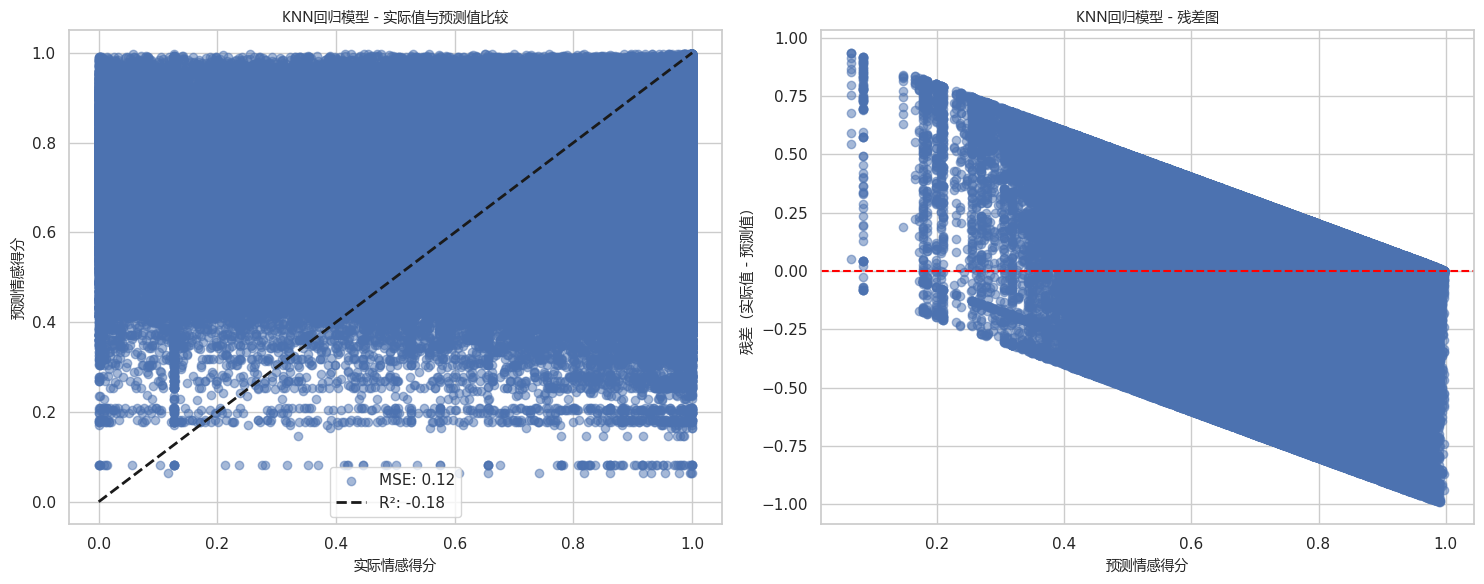

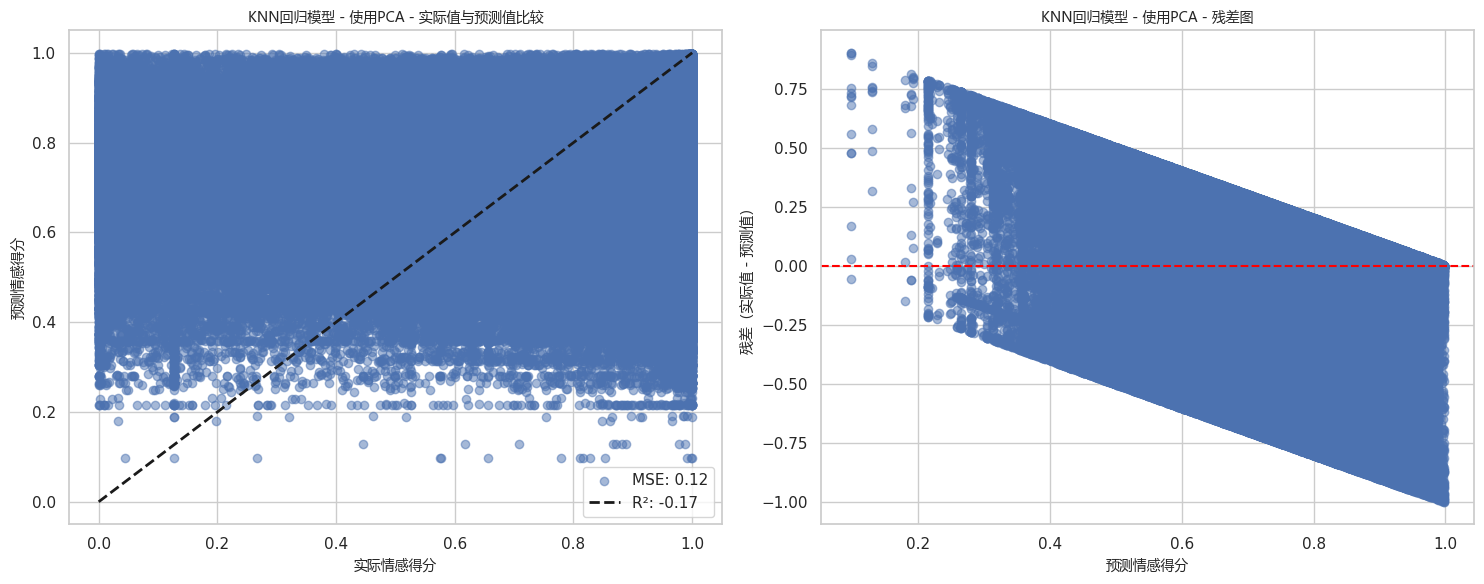

In [62]:
isPCA = False
knnModel = KNeighborsRegressor(n_neighbors=5)
y_pred_knn = train_model(X_train, y_train, X_test, knnModel, isPCA=isPCA)
mse_knn_without_pca = mean_squared_error(y_test, y_pred_knn)
r2_knn_without_pca = r2_score(y_test, y_pred_knn)
plotResults(y_test.values, y_pred_knn.get(), 'KNN回归模型',
            mse_knn_without_pca, r2_knn_without_pca, target, isPCA=isPCA)


isPCA = True
knnModel = KNeighborsRegressor(n_neighbors=5)
y_pred_knn = train_model(X_train, y_train, X_test, knnModel, isPCA=isPCA)
mse_knn_with_pca = mean_squared_error(y_test, y_pred_knn)
r2_knn_with_pca = r2_score(y_test, y_pred_knn)
plotResults(y_test.values, y_pred_knn.get(), 'KNN回归模型',
            mse_knn_with_pca, r2_knn_with_pca, target, isPCA=isPCA)

In [63]:
evaluations = [
    ("线性回归模型", False, mse_lr_without_pca, r2_lr_without_pca),
    ("线性回归模型", True, mse_lr_with_pca, r2_lr_with_pca),
    ("随机森林模型", False, mse_rf_without_pca, r2_rf_without_pca),
    ("随机森林模型", True, mse_rf_with_pca, r2_rf_with_pca),
    ("KNN回归模型", False, mse_knn_without_pca, r2_knn_without_pca),
    ("KNN回归模型", True, mse_knn_with_pca, r2_knn_with_pca)
]

print_evaluation_table(evaluations)

| 模型 | 是否使用PCA | MSE | R² 分数 |
|------|------------|-----|---------|
| 线性回归模型 | 否 | 0.10 | 0.00 |
| 线性回归模型 | 是 | 0.10 | 0.00 |
| 随机森林模型 | 否 | 0.10 | 0.01 |
| 随机森林模型 | 是 | 0.10 | 0.01 |
| KNN回归模型 | 否 | 0.12 | -0.18 |
| KNN回归模型 | 是 | 0.12 | -0.17 |

